## CS 372

### Assignment 2 - Decision Trees

- Grace Biggs

- Brandon L'Abbe

- Lane Thompson

- Zhiyi Zhan

Dataframe: 
   Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   47     148       2    7.5  Undergrad         0              0   
1   48      71       2    1.7  Undergrad       145              0   
2   62      58       4    1.7  Undergrad         0              0   
3   57      28       3    0.2  Undergrad         0              0   
4   51      70       1    1.2  Undergrad       169              0   

   Securities Account  CD Account  Online  CreditCard  
0                   0           1       1           1  
1                   0           0       0           1  
2                   0           0       1           0  
3                   0           0       1           1  
4                   0           0       0           0  
Number of Duplicates: 
13
Age                   0
Income                0
Family                0
CCAvg                 0
Education             4
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account         

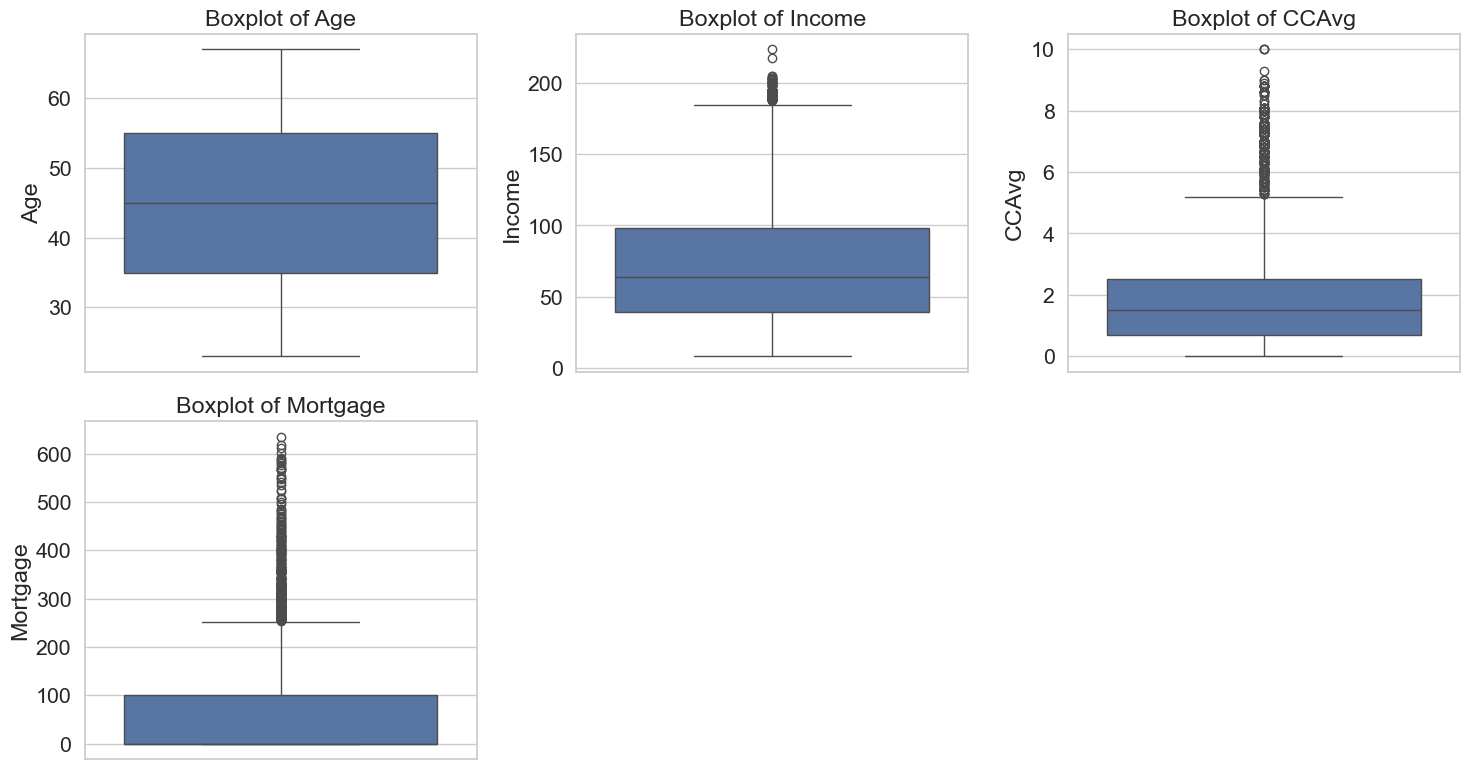

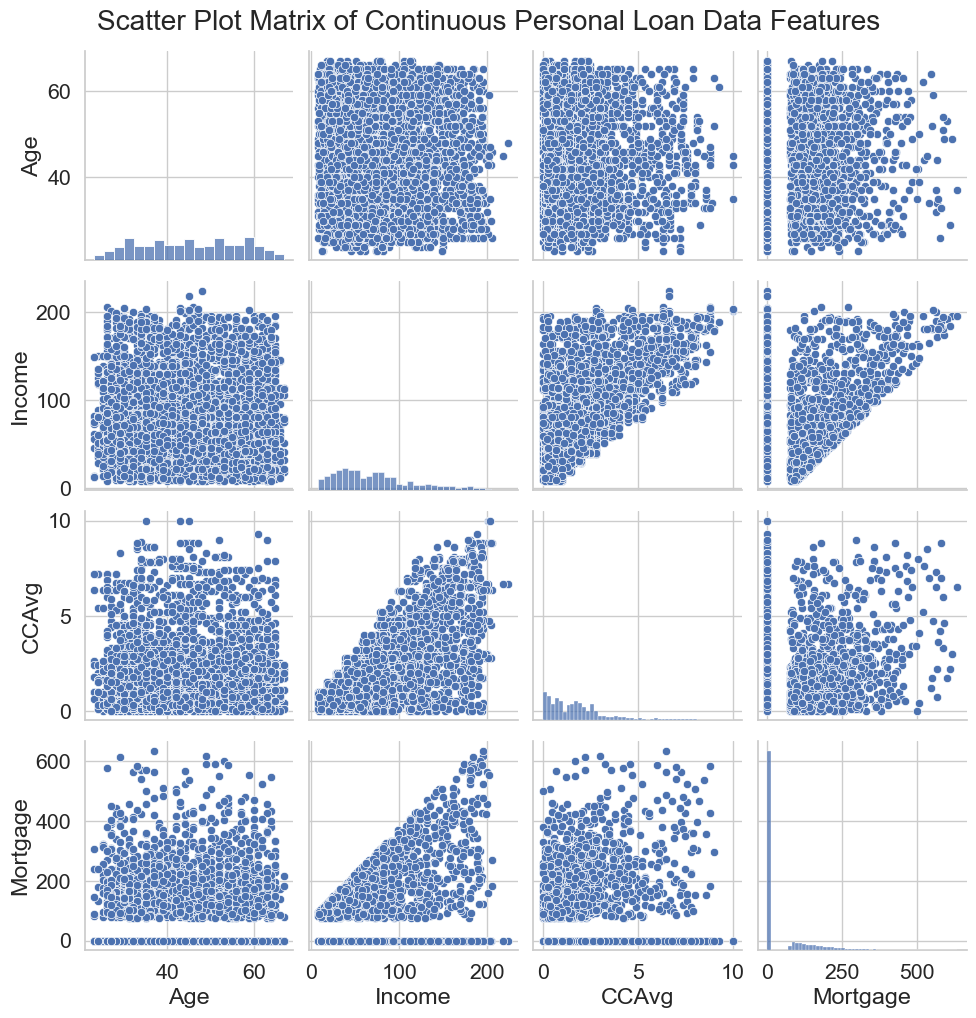

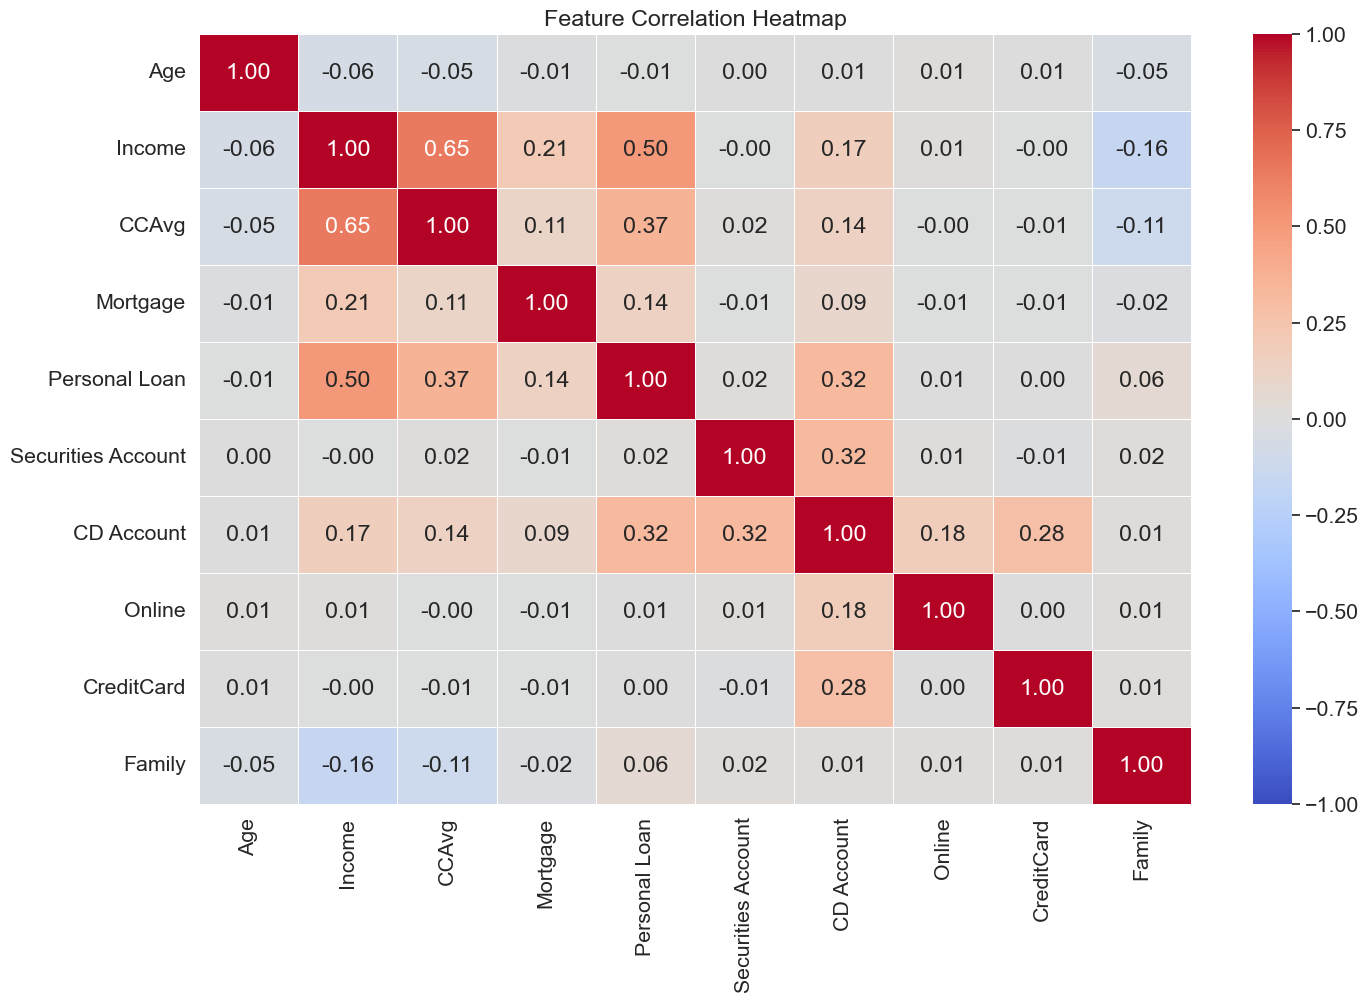

In [83]:
# Exploratory Data Analysis (Grace Biggs)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Personal Loan Data_DT.xlsx', sheet_name='Data')
df = df.drop(columns=['ID']) # Drop ID column - provides no useful info.
df = df.drop(columns=['ZIP Code']) # ZIP Code 
df = df.drop(columns=['Experience']) #  Extremely high correlation between Age and Experience. Drop Experience.
# Binary: Personal Loan, Securities Account, CD Account, Online, Credit Card
# Continuous: Age, Experience, Income, CCAvg, Mortgage
# Ordinal: Family
# Categorical: Education
# Other: ZIP Code

print("Dataframe: ")
print(df.head())
print("Number of Duplicates: ")
print(df.duplicated().sum()) # Should be 0
print(df.isnull().sum()) # 2 missing experience, 4 missing education
# We're making a Decision Tree from this dataset of 5000 rows. Because only 6 rows (0.12%) are missing data, we can safely drop them.
df = df.dropna()

# Check for outliers with Boxplots. 
continuous_vars = ['Age', 'Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(15,8))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# How do we deal with outliers? Do nothing? Pre-pruning? Post-pruning?

# Draw scatter plot matrix for all features. Comment.
sns.pairplot(df[continuous_vars])
plt.suptitle('Scatter Plot Matrix of Continuous Personal Loan Data Features', y=1.02)
plt.show()

# Draw a heatmap plot between features. Comment.
binary_vars = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
ordinal_vars = ['Family']
numeric_vars = continuous_vars + binary_vars + ordinal_vars

plt.figure(figsize=(16,10))
sns.heatmap(df[numeric_vars].corr(), annot=True, fmt=".2f", 
            cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Decision Trees
#### Grace Biggs, Brandon L'Abbe, Lane Thompson

In [88]:
import sklearn

X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']
# Convert categorical columns into one-hots with ColumnTransformer()
ct = sklearn.compose.ColumnTransformer(
    transformers=[('cat', sklearn.preprocessing.OneHotEncoder(drop='first'), ['Education'])],
    remainder='passthrough'
)
# Apply the transformation to the features
X_processed = ct.fit_transform(X)
# split the data into training and validation sets
data_train, data_test, label_train, label_test = sklearn.model_selection.train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Build and compare two Decision Trees, based on Gini Impurity and Entropy.
state_value = None
gini_tree = sklearn.tree.DecisionTreeClassifier(criterion='gini',random_state=state_value)
gini_tree.fit(data_train, label_train)
print("Gini Tree Score: ", gini_tree.score(data_test, label_test))
entropy_tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy',random_state=state_value)
entropy_tree.fit(data_train, label_train)
print("Entropy Tree Score: ", entropy_tree.score(data_test, label_test))


# Visualize the fully-grown Decision Trees you built with a tree graph. 
# Include the feature name in the visualization of the trees, not the index of the feature.


Gini Tree Score:  0.973
Entropy Tree Score:  0.977


## Model Evaluation
#### Lane Thompson
- Evaluate the performance of your classifier using:
    - execution time
    - accuaracy
    - confusion matrix (comment on the results)
- Analyze, explain, and comment on the evaluation results
- How does the Number of training sample affect performance (accuracy, time, etc.)? Explain and draw graphs to support your claims.

#### Gini Impurity

Execution time: 0.0010 seconds
Accuracy: 0.9730
Confusion Matrix:


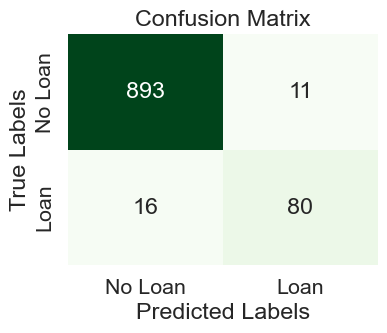

In [89]:
## Evaluate the performance of your classifier using:
# execution time
import time
import sklearn

start = time.time()
label_prediction = gini_tree.predict(data_test)
end = time.time()
execution_time = end - start
print(f"Execution time: {execution_time:.4f} seconds")
# accuracy
accuracy = sklearn.metrics.accuracy_score(label_test, label_prediction)
print(f"Accuracy: {accuracy:.4f}")
# confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(label_test, label_prediction)
print("Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(sklearn.metrics.confusion_matrix(label_test, label_prediction),
            annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Entropy

Execution time: 0.0000 seconds
Accuracy: 0.9770
Confusion Matrix:


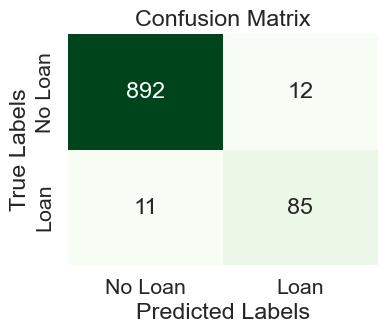

In [86]:
## Evaluate the performance of your classifier using:
# execution time
import time
import sklearn

start = time.time()
label_prediction = entropy_tree.predict(data_test)
end = time.time()
execution_time = end - start
print(f"Execution time: {execution_time:.4f} seconds")
# accuracy
accuracy = sklearn.metrics.accuracy_score(label_test, label_prediction)
print(f"Accuracy: {accuracy:.4f}")
# confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(label_test, label_prediction)
print("Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(sklearn.metrics.confusion_matrix(label_test, label_prediction),
            annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

- Analyze, explain, and comment on the evaluation results
With the random state set to 42 for both models shows that 
- How does the Number of training sample affect performance (accuracy, time, etc.)? Explain and draw graphs to support your claims.

In [87]:
# Tree Pruning (YOUR NAME HERE)